## Reference

https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

# Import

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from tqdm.notebook import tqdm

In [3]:
%cd /content/drive/My Drive/20FA/DataMining/DigitRecog

/content/drive/.shortcut-targets-by-id/107/20FA/DataMining/DigitRecog


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5)),
])

In [5]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


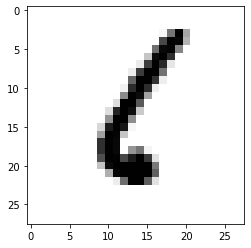

In [7]:
plt.imshow(images[0].squeeze(), cmap="gray_r")
plt.show()

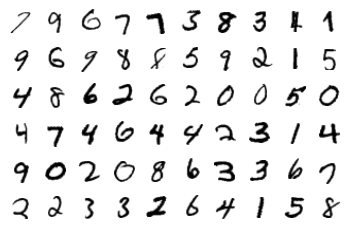

In [8]:
figure = plt.figure()
for index in range(1, 61):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].squeeze(), cmap='gray_r')

# Neural Network 1

In [9]:
# 2 CNN layers
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1, 
        out_channels=1,
        kernel_size=(3,3),
        stride=1,
        padding=1,
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=1, 
        out_channels=1,
        kernel_size=(3,3),
        stride=2,
        padding=1,
    ),
    nn.ReLU(),
    nn.Flatten(1, -1),
    nn.Linear(in_features=196, out_features=10),
    nn.LogSoftmax(dim=1),
)


In [10]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))

logps=model(images)
loss=criterion(logps, labels)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[[[ 0.0013, -0.0030, -0.0132],
          [-0.0029, -0.0017, -0.0082],
          [ 0.0073,  0.0069, -0.0052]]]])


## Training

In [13]:
# Put the parameters of model into optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
time0 = time()
epochs = 15

for e in tqdm(range(epochs)):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.397744912908339
Epoch 1 - Training loss: 0.35094216181588833
Epoch 2 - Training loss: 0.328661654382817
Epoch 3 - Training loss: 0.3178785914328815
Epoch 4 - Training loss: 0.3090840268220856
Epoch 5 - Training loss: 0.3036002234291674
Epoch 6 - Training loss: 0.2991932151255323
Epoch 7 - Training loss: 0.29626753309499354
Epoch 8 - Training loss: 0.28997316002559814
Epoch 9 - Training loss: 0.28794241896760997
Epoch 10 - Training loss: 0.28507200847747227
Epoch 11 - Training loss: 0.28353214655508363
Epoch 12 - Training loss: 0.2812810523955743
Epoch 13 - Training loss: 0.2819290509594402
Epoch 14 - Training loss: 0.27882546477957065


Training Time (in minutes) = 4.208930110931396


## Validation

Predicted Digit = 2


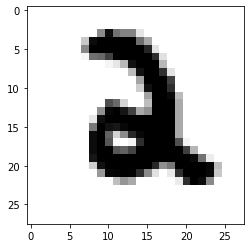

In [38]:
images, labels = next(iter(valloader))

with torch.no_grad():
    logps = model(images)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

plt.imshow(images[0].squeeze(dim=0), cmap='gray_r')

In [62]:
correct_count, all_count = 0, 0
for images,labels in tqdm(valloader):
    with torch.no_grad():
        logps = model(images)

    pred_label = logps.argmax(dim=1)
    true_label = labels
    correct_count += torch.sum(pred_label == true_label).item()
    all_count += len(labels)

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9232


# Neural Network 2

In [65]:
# Baseline: 3 Linears
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(
    nn.Flatten(1, -1),
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.LogSoftmax(dim=1)
)


## Training

In [67]:
# Put the parameters of model into optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
time0 = time()
epochs = 15

for e in tqdm(range(epochs)):
    running_loss = 0
    for images, labels in tqdm(trainloader):
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.4027424978850874



Epoch 1 - Training loss: 0.3303218079623637



Epoch 2 - Training loss: 0.2963784639435663



Epoch 3 - Training loss: 0.27008009496639407



Epoch 4 - Training loss: 0.24750084514969956



Epoch 5 - Training loss: 0.2253012157785994



Epoch 6 - Training loss: 0.2074448968619426



Epoch 7 - Training loss: 0.19112220518529288



Epoch 8 - Training loss: 0.17652675048954514



Epoch 9 - Training loss: 0.16413527098037542



Epoch 10 - Training loss: 0.15218778209153142



Epoch 11 - Training loss: 0.14248265805783303



Epoch 12 - Training loss: 0.13376484567255797



Epoch 13 - Training loss: 0.12639806449993143



Epoch 14 - Training loss: 0.11990390112822148


Training Time (in minutes) = 3.121389027436574


## Validation

Predicted Digit = 9


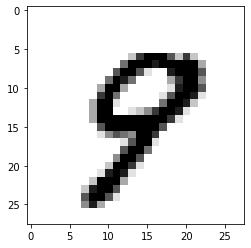

In [69]:
images, labels = next(iter(valloader))

with torch.no_grad():
    logps = model(images)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

plt.imshow(images[0].squeeze(dim=0), cmap='gray_r')

In [70]:
correct_count, all_count = 0, 0
for images,labels in tqdm(valloader):
    with torch.no_grad():
        logps = model(images)

    pred_label = logps.argmax(dim=1)
    true_label = labels
    correct_count += torch.sum(pred_label == true_label).item()
    all_count += len(labels)

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9619


In [71]:
!jupyter nbconvert --to markdown mnist.ipynb

[NbConvertApp] Converting notebook mnist.ipynb to markdown
[NbConvertApp] Support files will be in mnist_files/
[NbConvertApp] Making directory mnist_files
[NbConvertApp] Making directory mnist_files
[NbConvertApp] Making directory mnist_files
[NbConvertApp] Making directory mnist_files
[NbConvertApp] Writing 8816 bytes to mnist.md
